## Reconstruction histograms

In [1]:
import pandas as pn

reco_df = pn.read_csv("supervised_rmse_df.csv")
reco_df.head()

,Unnamed: 0,class,CIS,NIS,column,case
0,0,State-gov,1298,5223.0,workclass,1ftt
1,1,Without-pay,14,4132.0,workclass,1ftt
2,2,?,1836,5723.0,workclass,1ftt
3,3,Local-gov,2093,5855.0,workclass,1ftt
4,4,Self-emp-not-inc,2541,6191.0,workclass,1ftt


In [2]:
reco_df[reco_df["class"] == 'State-gov'].head()

,Unnamed: 0,class,CIS,NIS,column,case
0,0,State-gov,1298,5223.0,workclass,1ftt
96,0,State-gov,1298,0.0,workclass,1ttt
192,0,State-gov,1298,4549.0,workclass,1mtt
288,0,State-gov,1298,0.0,workclass,1tffNone
384,0,State-gov,1298,4691.0,workclass,1fff


In [3]:
real_cis = reco_df[["class", "column","CIS"]]
real_cis.drop_duplicates(inplace=True)
real_cis.loc[:,"case"] = "real" 
real_cis = real_cis.rename(columns={"CIS":"count"})
real_cis.shape

reco_dff = reco_df[["class","column","case","NIS"]].rename(columns={"NIS":"count"})
print(reco_dff.shape)
print(reco_dff.shape[0] + real_cis.shape[0])

reco_dff.head()

reco_count = reco_dff.merge(real_cis, how="outer", on=["class","column","case","count"])
reco_count.shape

(5760, 4)
5856


/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

(5856, 4)

In [4]:
import re
def get_splitted_case(df):
    df["privacy"] = df["case"].map(lambda x: re.findall("\d+", x)[0] if x!="real" else x)
    df["real"] = df["case"].map(lambda x: re.findall("[^\d]",x)[0] if x!="real" else x)
    df["uniform"] = df["case"].map(lambda x: int(re.findall("[^\d]",x)[1] == "t") if x!="real" else x)
    df["uniform2"] = df["case"].map(lambda x: int(re.findall("[^\d]",x)[2] == "t") if x!="real" else x)
    return df

reco_df = get_splitted_case(reco_df)
reco_count = get_splitted_case(reco_count)

/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


TypeError: 'generator' object is not subscriptable

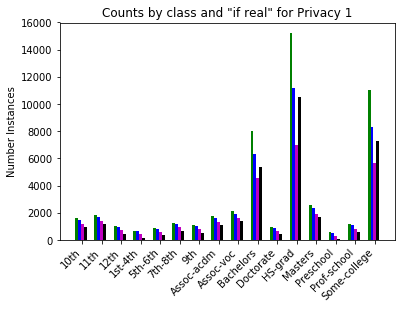

In [11]:
import numpy as np
from basic_units import cm, inch
import matplotlib.pyplot as plt

for pr in reco_df.privacy.unique():
    gb = reco_df[reco_df.privacy==pr][reco_df.column=="education"].groupby(["real", "class"])["NIS","CIS"].mean().reset_index()

    N = len(gb["class"].unique())

    real_list = list()
    real_order = list()
    fig, ax = plt.subplots()
    width_delta = 0.15         # the width of the bars
    ind = np.arange(N)    # the x locations for the groups
    real_colors = {"real":"k","t":"m","f":"g","m":"b"}
    class_order = gb[gb["real"]=="t"].sort_values(by="class", ascending=True)["class"].values
    width = 0 
    for real_level in np.append(gb["real"].unique(),"real"):
        if real_level != "real":
            cur_values = gb[gb["real"]==real_level].sort_values(by="class", ascending=True)["NIS"].values
        else:
            cur_values = gb[gb["real"]=="t"].sort_values(by="class", ascending=True)["CIS"].values

        cur_p = ax.bar(ind + width, cur_values, width_delta, color=real_colors[real_level], bottom=0*cm)
        real_list.append(cur_p)
        real_order.append(real_level)
        width += width_delta

    ax.set_title('Counts by class and "if real" for Privacy {pr}'.format(pr=pr))
    ax.set_xticks(ind + width / 2)
    ax.set_ylabel("Number Instances")
    ax.set_xticklabels(class_order, rotation = 45, ha="right")
    ax.legend((p[0] for p in real_list if ), tuple(real_order))
    ax.yaxis.set_units(inch)
    ax.autoscale_view()
    plt.savefig("/Users/juanzinser/Documents/plots/reconstruction_{pr}".format(pr=pr))
    plt.show()

In [9]:
cur_p[0]

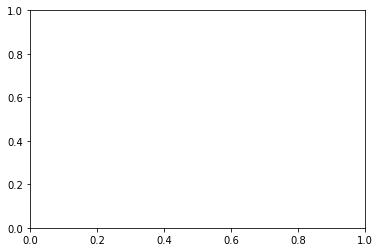

Signature: ax.plot(*args, data=None, **kwargs)
Docstring:
Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can b

In [6]:
fig, ax = plt.subplots()
?ax.plot